Author: Carlos Eduardo Gonçalves de Oliveira

Date: jul, 21, 2021

## **Loading and cleaning data**

Importing libraries and loading data...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# "setting" working directory
pwd = "/content/drive/MyDrive/Colab Notebooks/Sleep Classification, Data Science/"

# loading data
data = pd.read_excel(pwd + "sleep_classification.xlsx")

# printing data
data

,,.1,EEG,EEG .1,EEG .2,EEG .3,EEG .4,EEG .5,EEG .6,EEG .7,EEG .8,EEG .9,EEG .10,EEG .11,EEG .12,EEG .13,EEG .14,EEG .15,EEG .16,EEG .17,EEG .18,EEG .19,EEG .20,EEG .21,EEG .22,EEG .23,EEG .24,EEG .25,EEG .26,EEG .27,EEG .28,EEG .29,EEG .30,EEG .31,EEG .32,EEG .33,EEG .34,EEG .35,EEG .36,EEG .37,EEG .38,EEG .39,EEG .40,EEG .41,EEG .42,EEG .43,EEG .44,EMG
0,Time,Cmt Text,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power,Power
1,,,uV² (0 - 1 Hz),uV² (1 - 2 Hz),uV² (2 - 3 Hz),uV² (3 - 4 Hz),uV² (4 - 5 Hz),uV² (5 - 6 Hz),uV² (6 - 7 Hz),uV² (7 - 8 Hz),uV² (8 - 9 Hz),uV² (9 - 10 Hz),uV² (10 - 11 Hz),uV² (11 - 12 Hz),uV² (12 - 13 Hz),uV² (13 - 14 Hz),uV² (14 - 15 Hz),uV² (15 - 16 Hz),uV² (16 - 17 Hz),uV² (17 - 18 Hz),uV² (18 - 19 Hz),uV² (19 - 20 Hz),uV² (20 - 21 Hz),uV² (21 - 22 Hz),uV² (22 - 23 Hz),uV² (23 - 24 Hz),uV² (24 - 25 Hz),uV² (25 - 26 Hz),uV² (26 - 27 Hz),uV² (27 - 28 Hz),uV² (28 - 29 Hz),uV² (29 - 30 Hz),uV² (30 - 31 Hz),uV² (31 - 32 Hz),uV² (32 - 33 Hz),uV² (33 - 34 Hz),uV² (34 - 35 Hz),uV² (35 - 36 Hz),uV² (36 - 37 Hz),uV² (37 - 38 Hz),uV² (38 - 39 Hz),uV² (39 - 40 Hz),uV² (40 - 41 Hz),uV² (41 - 42 Hz),uV² (42 - 43 Hz),uV² (43 - 44 Hz),uV² (44 - 45 Hz),uV² (185 - 235 Hz)
2,13:47:28.743000,WAKE,33.5027,42.4104,31.6974,22.4518,19.1066,23.7503,21.6567,18.7977,17.788,15.2658,8.39669,7.93396,5.14693,4.70291,4.98123,5.81337,6.8825,4.87824,4.05436,5.38539,3.61687,2.96233,4.66441,4.43173,3.9774,4.51848,4.84338,4.63713,4.29372,4.4089,2.73922,4.0386,4.14654,4.47889,3.08664,2.77654,1.00903,1.88656,2.47569,1.99274,2.09528,3.45933,3.5223,1.6513,2.54113,18.2454
3,13:47:38.743000,WAKE,28.5535,70.8884,44.6377,37.2159,26.9866,37.7794,18.7077,16.1939,15.9945,16.2812,8.89412,7.15587,8.1304,5.65966,5.1159,5.39478,7.31475,6.2858,7.94438,6.76864,3.92871,3.28307,4.98302,3.34784,3.60392,2.99813,3.53761,5.66793,3.19567,4.48537,2.57176,2.96387,2.94921,2.56172,5.97782,4.3102,4.04421,2.19983,2.1457,2.78521,2.73395,2.31908,2.56638,2.01645,1.99053,22.3492
4,13:47:48.743000,WAKE,50.1367,89.0026,52.831,25.7199,25.8086,14.9994,25.5077,18.71,24.4891,16.2367,10.1548,11.5496,4.97222,4.65109,4.13041,5.3261,3.92172,6.1649,7.50018,4.88407,4.31306,6.52423,3.41849,2.75411,4.06885,3.09492,2.99214,4.25487,2.65826,2.21206,2.30125,2.9405,2.44244,2.80307,1.55373,2.40617,3.12832,2.61369,2.32087,1.72986,1.72443,1.83808,2.19667,2.21129,1.27041,19.9152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,17:18:09.773000,NREM,71.4091,102.263,62.8447,43.4755,54.086,55.6934,39.6886,90.8008,43.8876,60.7727,21.4473,37.1228,42.0524,23.4666,19.883,18.1322,16.1175,9.32886,10.5271,8.62074,4.79503,4.22815,9.82277,8.88145,5.4374,5.41518,3.10462,2.90342,3.30304,3.72596,2.13603,2.51646,3.10062,1.43848,1.78041,1.96221,3.28183,2.38615,1.48431,1.68017,1.71807,1.51184,1.44047,1.00993,0.821899,1.32629
9907,17:18:19.773000,WAKE,34.1075,42.2814,21.4274,32.7272,30.5724,33.446,31.895,11.5973,17.4018,14.151,10.6667,7.80017,8.02366,4.74651,4.88059,6.76451,8.02842,11.7324,7.36768,4.72786,3.87375,3.99645,1.87809,2.04125,2.63276,3.63032,4.1127,2.33498,2.14822,1.58082,2.87216,2.79077,2.94267,2.12313,1.33387,2.51972,1.35368,1.58488,1.19787,1.42473,1.77003,1.24157,1.63089,0.836707,1.16965,3.77678
9908,17:18:29.773000,WAKE,22.5939,38.6157,23.7864,18.2612,20.5281,27.8216,29.2246,16.4726,6.73632,6.23023,3.04903,3.18678,3.36902,2.74633,2.91093,2.55799,4.008,3.41906,2.81809,2.98658,2.85143,4.01355,3.77222,3.26213,2.95948,1.79331,4.02841,4.3401,2.61792,2.62065,1.32091,1.87925,2.95083,2.29114,1.45101,2.92316,2.96338,2.26241,2.2627,1.51965,1.87667,2.56863,1.74227,1.1755,1.16867,3.03987
9909,17:18:39.773000,WAKE,90.0324,45.4362,15.8931,10.0349,11

Clearly I have problems. I need to delete the first two rows and change the name of all the columns to more intuitive ones. Here I go:

In [3]:
# dropping unnecessary rows and resetting indexes
data = data.drop(labels = [0, 1]).reset_index(drop = True)
data.reset_index()

# changing columns names
freqs = ["{}hz".format(i) for i in range(1, 46)] # freqs names
cg_cols = dict(zip(data.columns, ["time", "phase"] + freqs + ["emg"])) # mapping old-new column names
data.rename(columns = cg_cols, inplace = True)

# taking a look in the data
data

,time,phase,1hz,2hz,3hz,4hz,5hz,6hz,7hz,8hz,9hz,10hz,11hz,12hz,13hz,14hz,15hz,16hz,17hz,18hz,19hz,20hz,21hz,22hz,23hz,24hz,25hz,26hz,27hz,28hz,29hz,30hz,31hz,32hz,33hz,34hz,35hz,36hz,37hz,38hz,39hz,40hz,41hz,42hz,43hz,44hz,45hz,emg
0,13:47:28.743000,WAKE,33.5027,42.4104,31.6974,22.4518,19.1066,23.7503,21.6567,18.7977,17.788,15.2658,8.39669,7.93396,5.14693,4.70291,4.98123,5.81337,6.8825,4.87824,4.05436,5.38539,3.61687,2.96233,4.66441,4.43173,3.9774,4.51848,4.84338,4.63713,4.29372,4.4089,2.73922,4.0386,4.14654,4.47889,3.08664,2.77654,1.00903,1.88656,2.47569,1.99274,2.09528,3.45933,3.5223,1.6513,2.54113,18.2454
1,13:47:38.743000,WAKE,28.5535,70.8884,44.6377,37.2159,26.9866,37.7794,18.7077,16.1939,15.9945,16.2812,8.89412,7.15587,8.1304,5.65966,5.1159,5.39478,7.31475,6.2858,7.94438,6.76864,3.92871,3.28307,4.98302,3.34784,3.60392,2.99813,3.53761,5.66793,3.19567,4.48537,2.57176,2.96387,2.94921,2.56172,5.97782,4.3102,4.04421,2.19983,2.1457,2.78521,2.73395,2.31908,2.56638,2.01645,1.99053,22.3492
2,13:47:48.743000,WAKE,50.1367,89.0026,52.831,25.7199,25.8086,14.9994,25.5077,18.71,24.4891,16.2367,10.1548,11.5496,4.97222,4.65109,4.13041,5.3261,3.92172,6.1649,7.50018,4.88407,4.31306,6.52423,3.41849,2.75411,4.06885,3.09492,2.99214,4.25487,2.65826,2.21206,2.30125,2.9405,2.44244,2.80307,1.55373,2.40617,3.12832,2.61369,2.32087,1.72986,1.72443,1.83808,2.19667,2.21129,1.27041,19.9152
3,13:47:58.743000,WAKE,26.1063,21.7411,11.2331,13.5356,17.6623,26.7539,26.9258,8.20937,5.82518,3.33099,5.18153,3.31729,3.06923,2.264,2.20695,3.74099,3.57396,4.27181,3.69938,3.84285,3.33117,4.17798,2.32545,1.89909,2.8356,3.67831,4.5595,3.29727,2.86022,4.19305,5.93855,4.64267,2.85625,2.21428,2.49723,2.75237,2.86366,2.80471,1.99115,2.49786,2.69804,2.70283,2.47842,2.39512,2.80436,20.3905
4,13:48:08.743000,WAKE,66.2456,42.645,35.7521,38.54,23.3736,19.6328,41.2017,25.8623,16.6998,12.4232,6.31314,5.22875,7.7969,8.55072,5.46493,3.27266,3.98625,4.50073,3.78597,2.39719,2.96235,4.47597,4.63776,4.13738,3.32344,3.19158,3.59022,2.40364,1.69057,4.06453,3.5475,3.4584,2.64651,2.24892,2.92236,2.89967,3.29345,2.76454,2.57279,2.26638,3.57105,2.81921,3.74899,2.43318,3.02449,17.8988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,17:18:09.773000,NREM,71.4091,102.263,62.8447,43.4755,54.086,55.6934,39.6886,90.8008,43.8876,60.7727,21.4473,37.1228,42.0524,23.4666,19.883,18.1322,16.1175,9.32886,10.5271,8.62074,4.79503,4.22815,9.82277,8.88145,5.4374,5.41518,3.10462,2.90342,3.30304,3.72596,2.13603,2.51646,3.10062,1.43848,1.78041,1.96221,3.28183,2.38615,1.48431,1.68017,1.71807,1.51184,1.44047,1.00993,0.821899,1.32629
9905,17:18:19.773000,WAKE,34.1075,42.2814,21.4274,32.7272,30.5724,33.446,31.895,11.5973,17.4018,14.151,10.6667,7.80017,8.02366,4.74651,4.88059,6.76451,8.02842,11.7324,7.36768,4.72786,3.87375,3.99645,1.87809,2.04125,2.63276,3.63032,4.1127,2.33498,2.14822,1.58082,2.87216,2.79077,2.94267,2.12313,1.33387,2.51972,1.35368,1.58488,1.19787,1.42473,1.77003,1.24157,1.63089,0.836707,1.16965,3.77678
9906,17:18:29.773000,WAKE,22.5939,38.6157,23.7864,18.2612,20.5281,27.8216,29.2246,16.4726,6.73632,6.23023,3.04903,3.18678,3.36902,2.74633,2.91093,2.55799,4.008,3.41906,2.81809,2.98658,2.85143,4.01355,3.77222,3.26213,2.95948,1.79331,4.02841,4.3401,2.61792,2.62065,1.32091,1.87925,2.95083,2.29114,1.45101,2.92316,2.96338,2.26241,2.2627,1.51965,1.87667,2.56863,1.74227,1.1755,1.16867,3.03987
9907,17:18:39.773000,WAKE,90.0324,45.4362,15.8931,10.0349,11.9435,12.8911,46.9989,51.5547,33.0483,7.17145,4.84721,5.94275,4.26384,5.96476,4.06791,2.49045,2.69132,3.31728,3.58663,2.25583,2.43693,2.22161,1.06985,1.91757,2.37144,2.22536,2.15959,3.51554,1.96676,1.85197,1.84885,2.93811,2.66841,2.33681,2.17397,2.25074,1.15395,1.33146,1.27074,2.52966,2.69429,1.95253,2.59103,1.84277,3.05224,8.70248


Now it's perfect! Except for one thing: probably the dtype of all the columns is "object". Let me see:

In [4]:
# printing general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    9909 non-null   object
 1   phase   9909 non-null   object
 2   1hz     9909 non-null   object
 3   2hz     9909 non-null   object
 4   3hz     9909 non-null   object
 5   4hz     9909 non-null   object
 6   5hz     9909 non-null   object
 7   6hz     9909 non-null   object
 8   7hz     9909 non-null   object
 9   8hz     9909 non-null   object
 10  9hz     9909 non-null   object
 11  10hz    9909 non-null   object
 12  11hz    9909 non-null   object
 13  12hz    9909 non-null   object
 14  13hz    9909 non-null   object
 15  14hz    9909 non-null   object
 16  15hz    9909 non-null   object
 17  16hz    9909 non-null   object
 18  17hz    9909 non-null   object
 19  18hz    9909 non-null   object
 20  19hz    9909 non-null   object
 21  20hz    9909 non-null   object
 22  21hz    9909 non-null   

Yes, I am right. I must correct that:

In [5]:
# i will let pandas guess what is the best dtype for each column
data = data.infer_objects()

# seeing if it worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    9909 non-null   object 
 1   phase   9909 non-null   object 
 2   1hz     9909 non-null   float64
 3   2hz     9909 non-null   float64
 4   3hz     9909 non-null   float64
 5   4hz     9909 non-null   float64
 6   5hz     9909 non-null   float64
 7   6hz     9909 non-null   float64
 8   7hz     9909 non-null   float64
 9   8hz     9909 non-null   float64
 10  9hz     9909 non-null   float64
 11  10hz    9909 non-null   float64
 12  11hz    9909 non-null   float64
 13  12hz    9909 non-null   float64
 14  13hz    9909 non-null   float64
 15  14hz    9909 non-null   float64
 16  15hz    9909 non-null   float64
 17  16hz    9909 non-null   float64
 18  17hz    9909 non-null   float64
 19  18hz    9909 non-null   float64
 20  19hz    9909 non-null   float64
 21  20hz    9909 non-null   float64
 22  

Simply beautiful.

---

## **Exploring data**

As my intention is to build a model able to classify sleep stages, I will split the data into two sets, sampling it randomly.

The first set will be used for exploration and model building, and the second one will serve as a "final test". The proportion will be 50% to make it challenging.

In [ ]:
# of course I don't want rows with "NOT" classification, and that's why I'm dropping them
clean_data = data[data.phase != "NOT"]
fst_set = clean_data.sample(frac = 0.5, random_state = 669)
sec_set = clean_data.drop(index = fst_set.index)

Let's begin the exploration using the "describe" method:

In [ ]:
fst_set.describe(include = "all") # i want to see the summary of all the columns

,time,phase,1hz,2hz,3hz,4hz,5hz,6hz,7hz,8hz,9hz,10hz,11hz,12hz,13hz,14hz,15hz,16hz,17hz,18hz,19hz,20hz,21hz,22hz,23hz,24hz,25hz,26hz,27hz,28hz,29hz,30hz,31hz,32hz,33hz,34hz,35hz,36hz,37hz,38hz,39hz,40hz,41hz,42hz,43hz,44hz,45hz,emg
count,4948,4948,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
unique,4948,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,21:35:38.743000,WAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,172.801683,129.569456,78.438023,65.755157,56.802903,55.045392,66.640558,66.078533,43.805864,29.554781,22.891934,19.417668,17.762865,16.488632,15.194284,13.177010,11.047025,9.071289,7.704553,6.629006,5.900050,5.385636,4.921231,4.577943,4.258550,3.987344,3.754240,3.559479,3.392864,3.237551,3.069736,2.933084,2.753414,2.624466,2.528266,2.417184,2.336037,2.262646,2.188240,2.117075,2.063942,2.012713,1.939882,1.904939,1.849245,22.815273
std,NaN,NaN,756.654095,199.646472,57.121360,50.649297,33.651449,26.564905,31.012677,48.052209,31.744560,20.690470,16.635871,15.296193,14.691380,13.909747,12.942522,10.744966,8.267925,5.995659,4.379145,3.347516,2.702587,2.321005,1.927040,1.714569,1.523035,1.414645,1.281292,1.197095,1.132341,1.075853,1.025453,0.975156,0.914876,0.840112,0.821701,0.802442,0.775609,0.763349,0.764918,0.741006,0.740136,0.745646,0.741295,0.736707,0.741356,35.874287
min,NaN,NaN,4.600283,8.521066,5.459400,5.279997,6.133800,7.356781,12.254535,5.060137,3.841778,2.556452,2.173609,1.525533,1.600388,1.323798,1.349955,1.641029,1.328005,1.607231,1.308356,1.455425,1.079961,1.052644,1.069853,1.205072,0.883896,1.132442,1.078155,0.962916,0.986958,0.760196,0.831333,0.846123,0.779797,0.566899,0.595483,0.733960,0.612866,0.409646,0.538655,0.476389,0.499721,0.601451,0.489116,0.431064,0.393493,0.327988
25%,NaN,NaN,44.068488,55.741505,39.556319,33.090496,31.872329,35.028724,44.868994,34.534822,21.738839,14.146032,10.465441,8.191969,6.938754,6.223267,5.856384,5.479361,5.066715,4.720298,4.452930,4.238663,3.965074,3.734145,3.546728,3.291465,3.170070,2.972557,2.849173,2.687107,2.583777,2.480627,2.341027,2.231874,2.103804,2.023181,1.936500,1.837085,1.772494,1.712148,1.635592,1.574446,1.535993,1.474453,1.406592,1.369913,1.317630,3.409305
50%,NaN,NaN,68.797970,85.182942,65.356545,55.273882,50.452063,50.604253,60.836366,52.078223,35.574699,24.021078,17.687319,14.120794,12.465113,11.342952,10.346390,9.254743,8.153267,7.241653,6.546844,5.871499,5.365662,4.964295,4.586489,4.307258,4.030363,3.750024,3.565614,3.389444,3.257884,3.071067,2.942339,2.797821,2.616790,2.536645,2.419890,2.299177,2.233137,2.155453,2.072845,2.005797,1.953941,1.876465,1.815235,1.780492,1.713487,6.747095
75%,NaN,NaN,118.812457,137.244451,101.244084,85.349587,74.868794,69.900574,80.737377,80.119053,56.673173,39.382882,31.486293,26.472129,24.919740,22.911528,20.768096,17.797007,14.736775,11.734602,9.873847,8.295937,7.284231,6.568647,5.961193,5.523598,5.095364,4.784674,4.483334,4.228136,4.018676,3.827065,3.644227,3.501649,3.271537,3.095423,2.973855,2.870094,2.786509,2.700050,2.587836,2.558021,2.46123

Apparently the data has some very high values over the low frequencies (1-4Hz), but it's normal due to the fact that EEG and EMG data has pink noise and they are strictly positive values.

Let me plot an histogram of one of the frequencies:

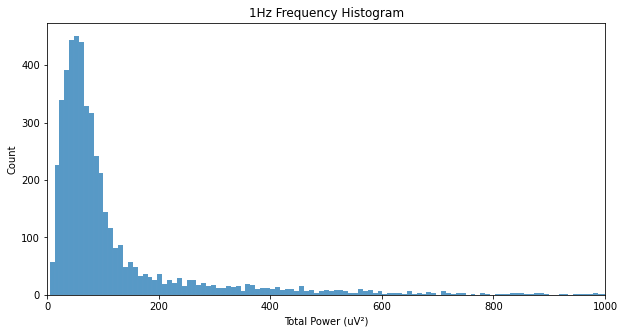

In [ ]:
# histogram for 1hz frequency
_, axis = plt.subplots(figsize = (10, 5))
sns.set_style("white")
sns.histplot(ax = axis, data = fst_set['1hz'])
plt.title("1Hz Frequency Histogram")
plt.xlabel("Total Power (uV²)")
plt.xlim((0, 1000)) # adjusting xscale, otherwise it is impossible to analyse the plot
plt.show()

All the other Total Powers follow this pattern (right-skewed distribution).

I will try to do a log transform and see how the histogram reacts:

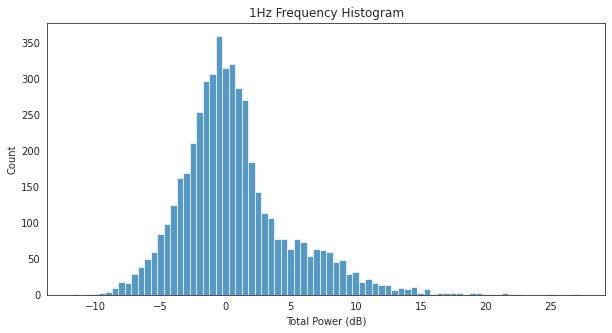

In [ ]:
# histogram of 1hz frequency, log transformed
_, axis = plt.subplots(figsize = (10, 5))
sns.set_style("white")
sns.histplot(ax = axis,
             data = 10*np.log10(fst_set['1hz']/np.median(fst_set['1hz']))) # db transformed, 1hz median as
plt.title("1Hz Frequency Histogram")                                       # reference
plt.xlabel("Total Power (dB)")
plt.show()

 It is a lot better!

 Note that, before the log transform, the data was more right skewed. This behaviour affects profoundly the statistics (like mean, variance, etc.), and that's why I will log transform all the other numerical columns:

 **Note:** all the transformations that I apply to fst_set must be applied to sec_set!

In [ ]:
#### transforming fst_set (db, 1hz fst_set median as reference)
fst_logset = fst_set.copy()
# emg
fst_logset["emg"] = 10*np.log10(fst_logset["emg"]/np.median(fst_set["emg"]))
# eeg frequency columns
for col in freqs:
    fst_logset[col] = 10*np.log10(fst_logset[col]/np.median(fst_set["1hz"]))

#### transforming sec_set (db, 1hz fst_set median as reference)
sec_logset = sec_set.copy()
# emg
sec_logset["emg"] = 10*np.log10(sec_logset["emg"]/np.median(fst_set["emg"]))
# eeg frequency columns
for col in freqs:
    sec_logset[col] = 10*np.log10(sec_logset[col]/np.median(fst_set["1hz"])) # fst_set median!!

I used 1hz total power median (from fst_set) as reference to calculate dB of all EEG frequency columns.

Now I would like to plot the EEG spectrum for each sleep stage, but first I need to know if the mean and the variance are valid metrics for the frequencies. In other words, **the normality must be tested** for all numeric columns, given each sleep stage:

In [ ]:
# defining useful function, that returns only the p-value from the test
def test_pvalue(series):
    ''' function that returns only the pvalue
    from the normaltest function '''
    from scipy.stats import normaltest

    _, pvalue = normaltest(series)

    return pvalue

In [ ]:
# function that prints how many columns are normal
def how_many_normal(phase):
    # separating data for phase and applying the function that was created
    test = fst_logset.loc[fst_logset["phase"] == phase, freqs + ["emg"]].apply(test_pvalue)

    # creating boolean column that test if pvalue > 0.05 (normal)
    test = pd.DataFrame({"pvalue": test, "is_normal": test > 0.05})

    # returning the quantity of normal features for phase
    print("The quantity of normal distributed features for phase = {} is {} out of 46.".format(
        phase, test.is_normal.sum()))

    return None

---
**Testing normality of the features given phase == "WAKE"**

In [ ]:
how_many_normal("WAKE")

The quantity of normal distributed features for phase = WAKE is 14 out of 46.


---
**Testing normality of the features given phase == "NREM"**

In [ ]:
how_many_normal("NREM")

The quantity of normal distributed features for phase = NREM is 29 out of 46.


---
**Testing normality of the features given phase == "REM"**

In [ ]:
how_many_normal("REM")

The quantity of normal distributed features for phase = REM is 31 out of 46.


Should I use mean and variance? I don't think so.

For WAKE, just one third of the frequencies are normal. Of course this makes sense, because "WAKE" is a state of great complexity, with multiple possible behaviours. On the other hand, NREM and REM states had more normal distributed columns, but not all of them.

I will plot the EEG spectrum using the median and, to simulate the standard deviation, I will use the 1st and the 3rd quantiles.

In [ ]:
# defining function to plot spectrum
def plot_spectrum(phase):
    sns.set_style("whitegrid")
    _, axis = plt.subplots(figsize = (10, 5))

    # controlling colors
    if phase == "WAKE":
        color = "red"
    elif phase == "NREM":
        color = "blue"
    else:
        color = "green"

    # frequencies for interpolation
    f_interp = np.linspace(1, 45, 100)
    db = []
    # for each quantile...
    for q in [0.25, 0.5, 0.75]:
        alpha = 0.1
        if q == 0.5:
            alpha = 1
        # interpolating over the quantiles
        db_interp = np.interp(f_interp, [i for i in range(1, 46)], 
                            fst_logset.loc[fst_logset["phase"] == phase, freqs].quantile(q = q))
        # plotting
        sns.lineplot(x = f_interp, y = db_interp, ax = axis, color = color, alpha = alpha)
        db.append(db_interp)

    plt.fill_between(f_interp, db[-1], db[0], alpha = 0.1, color = color)
    plt.title("Median Spectrum ({})".format(phase))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Total Power (dB)")
    plt.show()

    return None

---
**Median Spectrum (WAKE)**

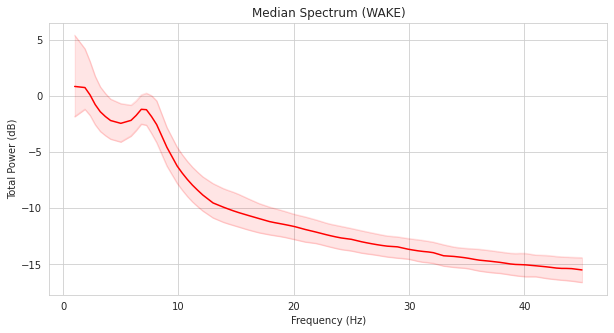

In [ ]:
plot_spectrum("WAKE")

---
**Median Spectrum (NREM)**

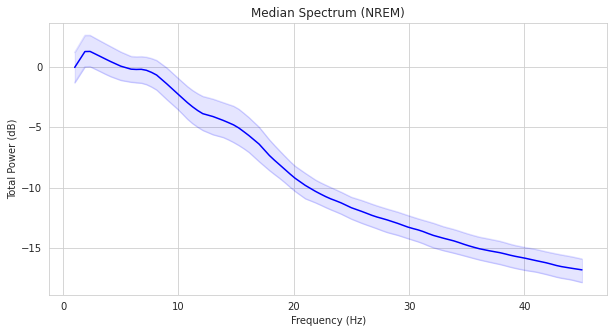

In [ ]:
plot_spectrum("NREM")

---
**Median Spectrum (REM)**

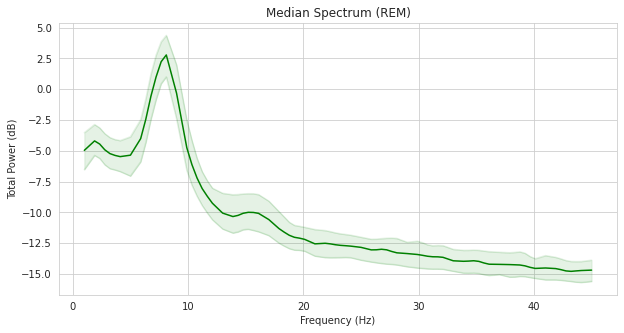

In [ ]:
plot_spectrum("REM")

---
**Comparing Median Spectrum of Each Sleep Stage**

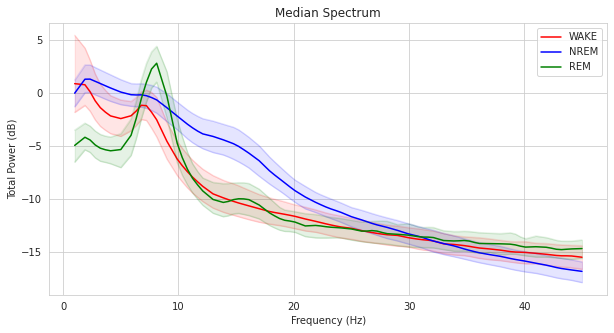

In [ ]:
#### plotting everything at once
sns.set_style("whitegrid")
_, axis = plt.subplots(figsize = (10, 5))
f_interp = np.linspace(1, 45, 100)

# looping between each phase/color
colors = ["red", "blue", "green"]
phases = ["WAKE", "NREM", "REM"]
for i in range(3):
    db = []
    # for each quantile...
    for q in [0.25, 0.5, 0.75]:
        label = None
        alpha = 0.1
        if q == 0.5:
            label = phases[i]
            alpha = 1
        # interpolating over the quantiles
        db_interp = np.interp(f_interp, [i for i in range(1, 46)], 
                            fst_logset.loc[fst_logset["phase"] == phases[i], freqs].quantile(q = q))
        # plotting
        sns.lineplot(x = f_interp, y = db_interp, ax = axis, color = colors[i], alpha = alpha,
                     label = label)
        db.append(db_interp)
    plt.fill_between(f_interp, db[-1], db[0], alpha = 0.1, color = colors[i])

plt.title("Median Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Total Power (dB)")
plt.legend()
plt.show()

Clearly the sleep stages are different in the spectrum. Of course this difference isn't perfect for every frequency, but there are regions where it is.

I'm now curious...

What happens if we use a clustering technique? The model will be able to "find" the sleep phases? Let's try with the model Agglomerative Clustering:

Agglomerative Clustering is a model for clustering that merges data points into clusters. The criterium for merging is "minimal distance", and of course there are different metrics for this. In the end, the model returns the "optimal great clusters" by which the data is divided, according to `n_clusters` parameter that we pass to the model.

---
**Preparing data for clustering**

In [ ]:
# preparing data for euclidian metrics
clust_data = fst_logset.drop(columns = ["phase", "time"])
for col in clust_data.columns:
    # standardizing columns
    clust_data[col] = (clust_data[col] - np.mean(clust_data[col]))/np.std(clust_data[col])

---
**Creating and applying clustering model**

In [ ]:
# creating and applying model
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 3) # the model will stop clustering data when n_clusters = 3

# giving data to the model and asking it to predict the cluster label
clusters = ac.fit_predict(clust_data)

---
**Analysing results**

In [ ]:
# constructing pivot table to compare phases with clusters
clust_data["phase"] = fst_logset["phase"].copy()
clust_data["cluster"] = clusters
pvtb = pd.pivot_table(clust_data, index = ["cluster", "phase"], values = "1hz", aggfunc = len)
pvtb.rename({"1hz": "Total Count"}, axis = 1, inplace = True)
pvtb

Total Count
cluster phase             
0       NREM         264.0
        REM          303.0
        WAKE        1656.0
1       NREM        1745.0
        REM           17.0
        WAKE         223.0
2       NREM           3.0
        WAKE         737.0

Yeah, it didn't worked as we expected. The clusters found by our model didn't converged to the typical sleep stages. But maybe it is capturing more patterns. What about we try greater values for n_clusters? Maybe n_clusters = 6 (I already tried 4 and 5, stay calm):

---
**Creating model with n_clusters = 6**

In [ ]:
ac1 = AgglomerativeClustering(n_clusters = 6) # what about n_cluster = 6?

# giving data to the model and asking it to predict the cluster label
clusters1 = ac1.fit_predict(clust_data.drop(columns = ["phase", "cluster"]))

---
**Analysing new results**

In [ ]:
# constructing pivot table to compare phases with new clusters
clust_data["cluster1"] = clusters1
pvtb1 = pd.pivot_table(clust_data, index = ["cluster1", "phase"], values = "1hz", aggfunc = len)
pvtb1.rename({"1hz": "Total Count"}, axis = 1, inplace = True)
pvtb1

Total Count
cluster1 phase             
0        NREM        1360.0
         REM           17.0
         WAKE         196.0
1        NREM           9.0
         REM          270.0
         WAKE         177.0
2        NREM           1.0
         REM           25.0
         WAKE         930.0
3        NREM         254.0
         REM            8.0
         WAKE         549.0
4        NREM         385.0
         WAKE          27.0
5        NREM           3.0
         WAKE         737.0

It's hard just look to the table. Let's plot it:

In [ ]:
# adjusting pivot table for a better interpretation
pvtb1 = pvtb1.reset_index()
for i in range(6):
    s = pvtb1.loc[pvtb1["cluster1"] == i, "Total Count"].sum()
    pvtb1.loc[pvtb1["cluster1"] == i, "Total Count"] = 100*pvtb1.loc[pvtb1["cluster1"] == i, "Total Count"]/s

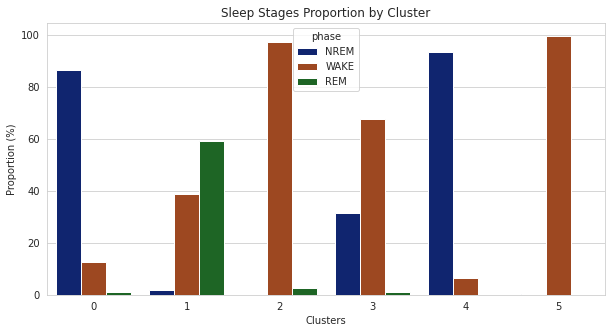

In [ ]:
# plotting results
_, axis = plt.subplots(figsize = (10, 5))
sns.barplot(data = pvtb1.reset_index(), x = "cluster1", y = "Total Count", hue = "phase",
            hue_order = ["NREM", "WAKE", "REM"], ax = axis, palette = "dark")
plt.xlabel("Clusters")
plt.ylabel("Proportion (%)")
plt.title("Sleep Stages Proportion by Cluster")
plt.show()

**Bam!!!** Our model actually identified more patterns than the three generic sleep stages! As we can see in the plot above, there is **2 types of NREM**, **3 types of WAKE** and **1 type of REM**. Does it makes sense? Yes, it does, and we could say that it's also more realistic. In scientific literature, at least in humans, NREM generally has substages [(reference)](https://doi.org/10.1016/j.brainresbull.2007.11.013), and WAKE is complex: the rat can be attentive, relaxing or moving. However, in the present case, note that each sleep stage isn't perfectly isolated in each cluster. But I think it worths the exploring anyway.

Now let's do something even more interesting: let's visualize in the feature space how these 6 clusters are separated. But there is a problem. How can we plot something with 46 dimensions? If we could reduce the dimensions of `clust_data` to just the 3 most important ones, it would be awesome. And we actually can.

Before this, let's change the cluster's labels to more intuitive ones:


Cluster | Intuitive Name
--- | ---
`0` | `NREM1`
`1` | `REM`
`2` | `WAKE1`
`3` | `WAKE2`
`4` | `NREM2`
`5` | `WAKE3`


In [ ]:
# replacing old cluster names by the new ones
clust_data.cluster1.replace({0: "NREM1", 1: "REM", 2: "WAKE1",
                             3: "WAKE2", 4: "NREM2", 5: "WAKE3"}, inplace = True)

I just changed the name of each cluster to the sleep stage that prevails.

Now let's apply PCA (Principal Component Analysis) for dimensionality reduction.

PCA is a dimensionality reduction model that tries different projections of the data (using the feature space) with the purpose of finding the projections with the most high variances (data more scattered).

---

**Initializing PCA model**

In [ ]:
from sklearn.decomposition import PCA

# initializing model
pca = PCA(n_components = 3) # i want just the three principal components

# fitting model and transforming data
pca_clust_data = pca.fit_transform(clust_data[freqs + ["emg"]])

In [ ]:
#TESTEEEEEEEEEEEEEEE
from sklearn.decomposition import PCA

# initializing model
pca = PCA() # i want just the three principal components

# fitting model and transforming data
pca_clust_data = pca.fit_transform(clust_data[freqs + ["emg"]])

---

**Variance ratio for each extracted component**

In [ ]:
# printing explained variances
for i in range(3):
    print("The component {} explains {:.2f}% of the total variance;".format(
        i+1, 100*pca.explained_variance_ratio_[i]))
print("----------------------------------------------------------------")
print("The three components explains {:.2f}% of the total variance.".format(
    100*pca.explained_variance_ratio_.sum()))

The component 1 explains 29.99% of the total variance;
The component 2 explains 11.10% of the total variance;
The component 3 explains 9.21% of the total variance;
----------------------------------------------------------------
The three components explains 50.30% of the total variance.


In [ ]:
# generating dataframe containing new coordinates and cluster labels
new_clust_data = pd.DataFrame({"component1": pca_clust_data[:, 0],
                               "component2": pca_clust_data[:, 1],
                               "component3": pca_clust_data[:, 2],
                               "cluster": clust_data["cluster1"]})

---

**Plotting data using the three extracted components**

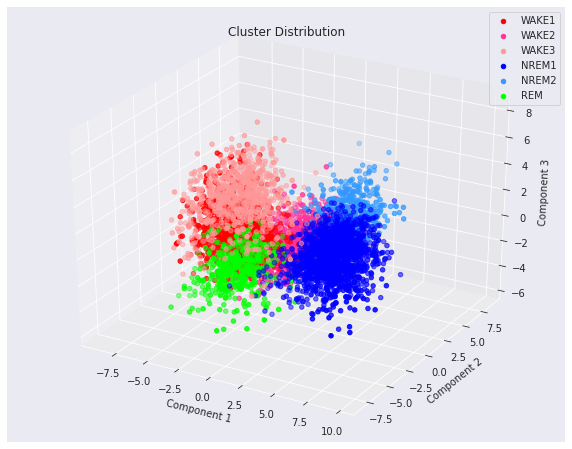

In [ ]:
# generating 3d scatter plot
sns.set_style("darkgrid")
fig = plt.figure(figsize = (10, 8))
axis = fig.add_subplot(111, projection = "3d")
stages = ["WAKE1", "WAKE2", "WAKE3", "NREM1", "NREM2", "REM"]
colors = [(1, 0, 0), (1, 0.2, 0.6), (1, 0.6, 0.6),          # for each stage there is a color
          (0, 0, 1), (0.2, 0.6, 1),
          (0, 1, 0)]

# for each stage and color...
for stage, color in zip(stages, colors):
    temp = new_clust_data[new_clust_data["cluster"] == stage]
    # scatter plot
    axis.scatter(temp.component1,
                temp.component2,
                temp.component3, label = stage, color = color)
axis.set_xlabel("Component 1")
axis.set_ylabel("Component 2")
axis.set_zlabel("Component 3")
axis.set_title("Cluster Distribution")
plt.legend()
plt.show()

Rotating axes...

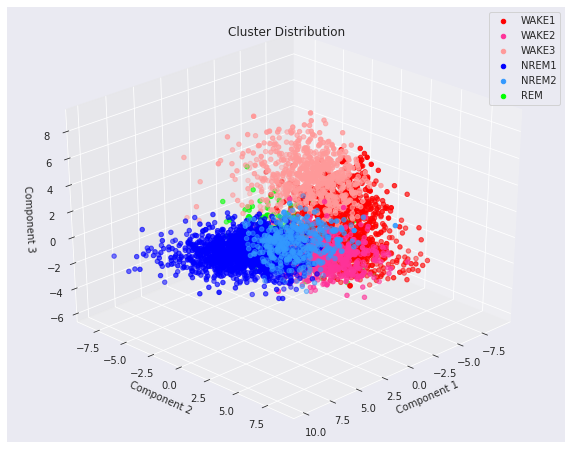

In [ ]:
# changing angles
axis.view_init(30, 45)
fig

From the 3d scatter plot, we can have an idea of how these cluster are separated in the feature space. `WAKE2` appears to be almost `NREM1`, while `WAKE3` is very different from the other clusters. I would risk to say that `WAKE3` is kind of "`WAKE` + moving", because of the great difference, while `WAKE2` would be "`WAKE` + almost sleeping".

Now let's go for the classification models.

---

## **Classification models**

First of all, we need to prepare our data. And as we saw in the section above, PCA is very useful for dimensionality reduction. What I'm gonna do now is to apply PCA again, but I will extract more than 3 components. My intention is to minimize redundance while training our classification models.

**Preparing data (again)**

In [ ]:
# initializing model
pca_all = PCA() # i want to extract all the components

# fitting model and transforming data
X = pca_all.fit_transform(clust_data[freqs + ["emg"]]) # i will continue to use clust_data, because it's standardized

Now let's plot the cummulative explained variance by component (components in descending order of importance):

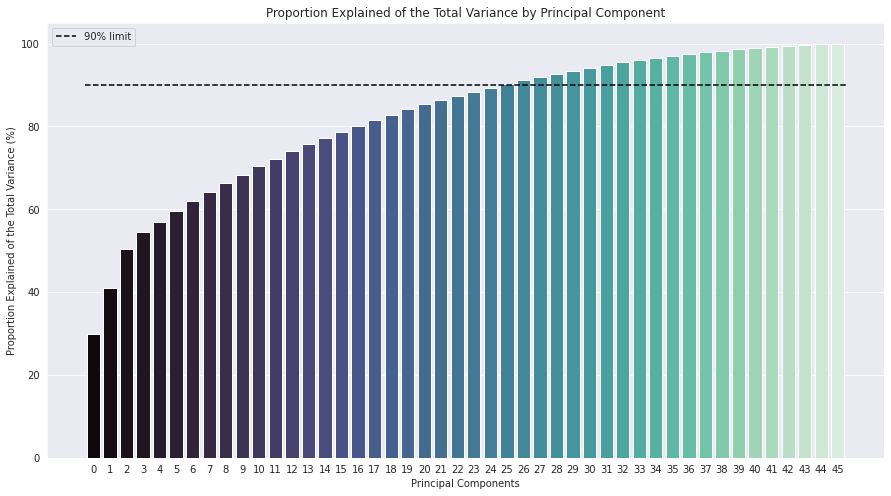

In [ ]:
sns.set_style("darkgrid")
_, axis = plt.subplots(figsize = (15, 8))
# sns.set_palette("rocket")
sns.barplot(x = list(range(46)), y = 100*pca_all.explained_variance_ratio_.cumsum(), ax = axis,
            palette = "mako")
xlim = plt.xlim()
axis.plot(xlim, (90, 90), 'k--', label = "90% limit")
plt.xlabel("Principal Components")
plt.ylabel("Proportion Explained of the Total Variance (%)")
plt.title("Proportion Explained of the Total Variance by Principal Component")
plt.legend()
plt.show()

From the plot above, we can see that only the first 26 principal components are sufficient to explain 90% of the total variance of our data. This means that probably the other components don't have distinctive information, and that's the reason why I will exclude them from our feature space:

In [ ]:
# taking only the first 26 principal components
X = X[:, :26]

Now we can begin our classification modelling.

---

**Support Vector Machine**

Support Vector Machine, in this case, is a classification model that tries to separate the classes by using an hyperplan. This hyperplan is constructed with the help of "Support Vectors" (data points with different classes that are in the "border").

When the margin of the hyperplan is maximized, then the hyperplan is the best.



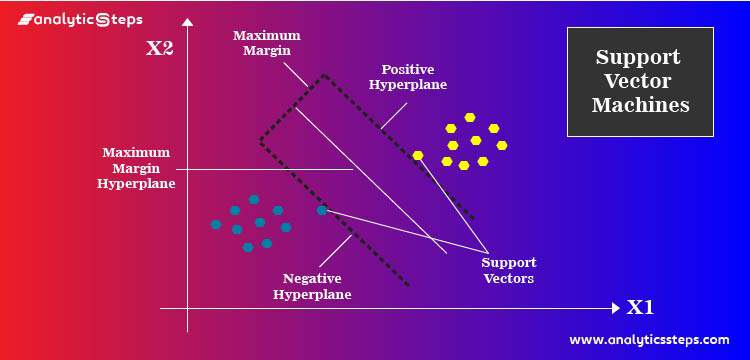


Image taken from: [https://www.analyticssteps.com/blogs/how-does-support-vector-machine-algorithm-works-machine-learning](https://www.analyticssteps.com/blogs/how-does-support-vector-machine-algorithm-works-machine-learning)

Note that when the classes are not linearly separable, then we can use kernels to transform the data. They basically apply non-linear functions to the data and project it into higher dimensions, where the classes are linearly separable. In this way, the best hyperplan is inversely transformed and in the final we have a curved surface that separates the classes.

Let's begin to scratch our model:

**ATTENTION: you don't need to run the cell below, run the next cell!**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib as jb

# defining parameters space for optimization
params = {"C": np.logspace(-2, 2, 5), # trying different values for C (tolerance to error, so to speak)
          "kernel": ("linear", "poly", "rbf", "sigmoid"), # trying different kernels
          "degree": [2, 3, 4], # trying different degrees for kernel = 'poly'
          "gamma": ("scale", "auto"), 
          "class_weight": ("balanced", None)} # trying weights

# creating generic model
svc = SVC()

# initializing gridsearchcv for parameter optimization
gs_svc = GridSearchCV(estimator = svc, param_grid = params, cv = 5, verbose = 2,
                      refit = True, n_jobs = -1)

# parameter optimization
gs_svc.fit(X, fst_set["phase"])

# saving optimized model
jb.dump(gs_svc, pwd + "gs_svc.pkl")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 29.0min finished


['/content/drive/MyDrive/Colab Notebooks/Sleep Classification, Data Science/gs_svc.pkl']

In [ ]:
# RUNNING THIS CELL YOU CAN LOAD THE MODEL ALREADY OPTIMIZED
import joblib as jb

gs_svc = jb.load(pwd + "gs_svc.pkl")

In [ ]:
# creating a dataframe containing the results of each parameter combination
svc_tb = pd.DataFrame(gs_svc.cv_results_)

# printing score of the best model with standard deviation
svc_tb.loc[gs_svc.best_index_, ["mean_test_score", "std_test_score"]]

mean_test_score     0.912288
std_test_score     0.0085153
Name: 122, dtype: object

Note that, instead of just create a SVC model, I did a parameter optimization using GridSeachCV. It basically works by testing each parameter combination that we pass using a k-fold cross validation (k = 5 in this case). In this way we can estimate what is the best combination for our model. 

As we can see above, the best model had 91.23% of mean test score, with 0.85% as standard deviation. Let's see what is the parameter combination for this model:

In [ ]:
# printing parameters combination for the best model
gs_svc.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The best model has a RBF (Radial Basis Function) kernel. Let's plot an histogram of how each kernel performed:

In [ ]:
# creating function to plot hist of each kernel
def plot_hist_kernel(kernel):
    sns.set_style("whitegrid")

    # taking only linear kernel
    temp = svc_tb[svc_tb["param_kernel"] == kernel].copy()
    temp["mean_test_score"] *= 100

    # plotting
    _, axis = plt.subplots(figsize = (10, 6))
    sns.histplot(data = temp, x = "mean_test_score", ax = axis, bins = 35)

    ylim = axis.get_ylim()
    plt.plot((91.0, 91.0), ylim, 'r--', label = "91% line")

    plt.xlabel("Mean Test Score (%)")
    plt.title("General Perfomance, kernel = " + kernel )
    plt.legend()
    plt.show()

    return None

---

**Kernel = linear**

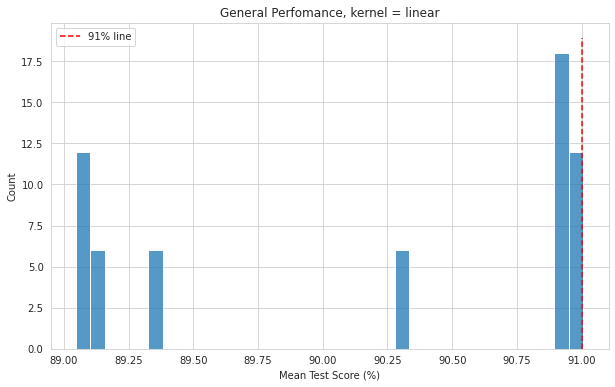

In [ ]:
plot_hist_kernel("linear")

---

**Kernel = poly**

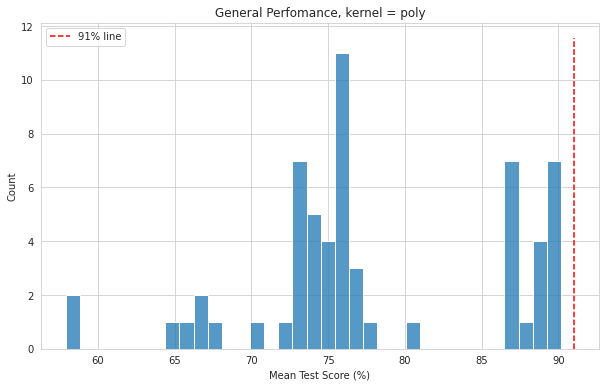

In [ ]:
plot_hist_kernel("poly")

---

**Kernel = RBF**

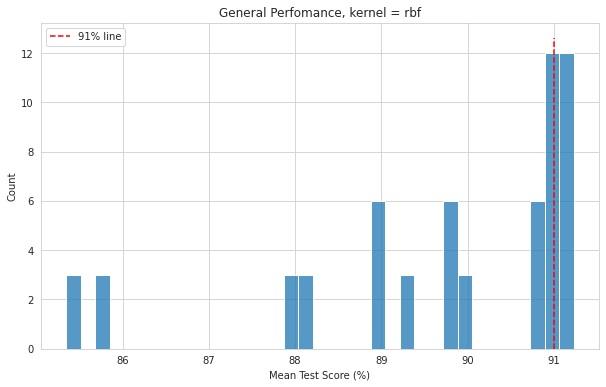

In [ ]:
plot_hist_kernel("rbf")

**Kernel = sigmoid**

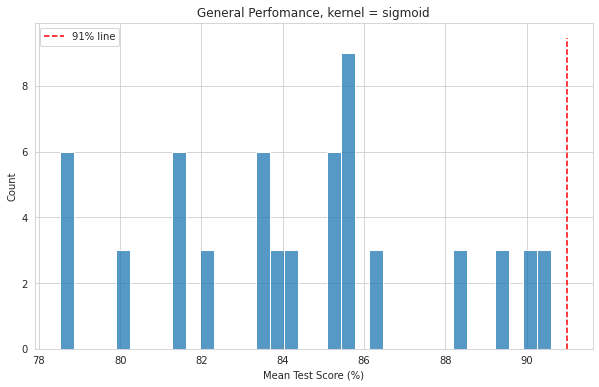

In [ ]:
plot_hist_kernel("sigmoid")

We can see that the only kernel that had mean test score higher than 91% was RBF. Apparently the worst performance was from polynomial kernel.

Let's try another model now.

---

**K-Nearest Neighbors Classifier**

The name of the model is very suggestive. It works in a instance-based form: k is the number of neighbors that the model will consider to classification.

In the image below, it is showed how KNN basically works:

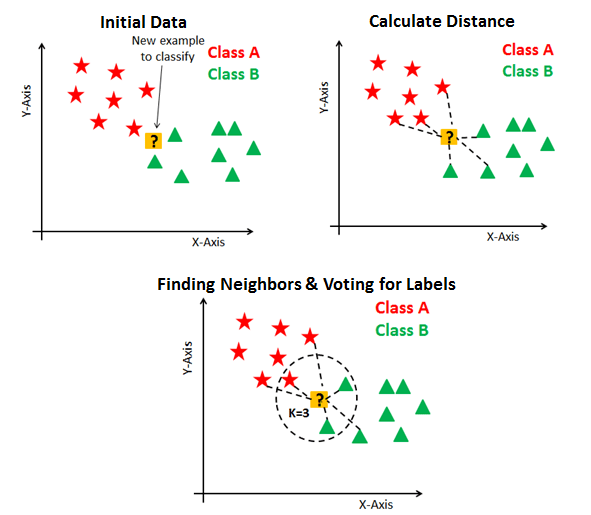

Image taken from: [https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/](https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/)

It is worth noting that, the lower the k, the more overfit our model will be; on the other hand, the greater the k, the more underfit our model will be. And of course different distance metrics will affect the decision about which data points are the k nearest neighbors.

Let's put it all in action, trying to optimize the model over different values for k and for different distance metrics:

**ATTENTION: you don't need to run the cell below, run the next cell!**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import joblib as jb

# defining param_grid for optimization
params = {"n_neighbors": range(1, int(np.sqrt(len(X)))), # trying different values for k
          'p': range(1, 4)} # trying manhatan distance, euclidian distance and minkowski distance with p = 3

# initializing generic model
knc = KNeighborsClassifier()

# initializing gridsearchcv object for optimization
gs_knc = GridSearchCV(knc, param_grid = params, n_jobs = -1, verbose = 3, refit = True,
                      cv = 5)

# starting optimization
gs_knc.fit(X, fst_set["phase"])

# saving optimized model
jb.dump(gs_knc, pwd + "gs_knc.pkl")

Fitting 5 folds for each of 207 candidates, totalling 1035 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1035 out of 1035 | elapsed: 17.2min finished


['/content/drive/MyDrive/Colab Notebooks/Sleep Classification, Data Science/gs_knc.pkl']

In [ ]:
# RUNNING THIS CELL YOU CAN LOAD THE MODEL ALREADY OPTIMIZED
import joblib as jb

gs_knc = jb.load(pwd + "gs_knc.pkl")

Let's see the performance of the best model:

In [ ]:
knc_tb = pd.DataFrame(gs_knc.cv_results_)
knc_tb.loc[gs_knc.best_index_, ["mean_test_score", "std_test_score"]]

mean_test_score      0.910468
std_test_score     0.00805764
Name: 56, dtype: object

As we can see, the model had an mean score of 91.05%, with standard deviation of 0.81%. Let's see for which distance metric and for wich k does it occurs:

In [ ]:
gs_knc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=3,
                     weights='uniform')

The best score occured for distance metric = "minkowski, p = 3" and for k = 19 neighbors. Let's plot the mean test score for each k and in each distance metric:


In [ ]:
# creating function to plot lineplots
def line_plot_metric(p):
    # defining metrics
    metrics = ["Manhattan", "Euclidian", "Minkowski, p = 3"]

    # filtering just for the distance metric desired
    temp = knc_tb[knc_tb["param_p"] == p].copy()

    # adjusting percentage values
    temp["mean_test_score"] *= 100

    # plotting
    sns.set_style("whitegrid")
    _, axis = plt.subplots(figsize = (10, 6))
    sns.lineplot(data = temp, x = "param_n_neighbors", y = "mean_test_score", ax = axis)

    peak = temp["mean_test_score"].max()
    k = int(temp.loc[temp["mean_test_score"] == peak, "param_n_neighbors"])
    plt.scatter(k, peak, color = 'red',
                label = "max score = {:.2f}%, k = {}".format(peak, k))
    xlim = axis.get_xlim()
    plt.plot(xlim, (peak, peak), 'r--')
    plt.xlabel("Value for k")
    plt.ylabel("Mean Score (%)")
    plt.title("KNN, distance: " + metrics[p - 1])
    plt.legend()
    plt.show()

    return None

---

**Distance Metric = Manhatan Distance**

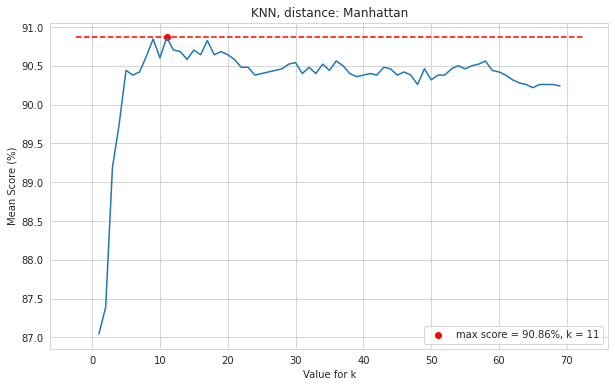

In [ ]:
line_plot_metric(1)

---

**Distance Metric = Euclidian**

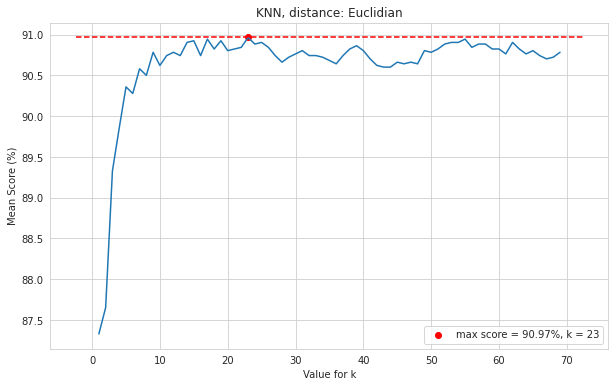

In [ ]:
line_plot_metric(2)

---

**Distance Metric = Minkowski (p = 3)**

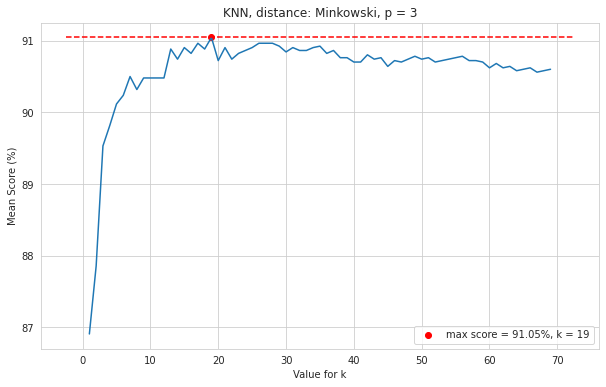

In [ ]:
line_plot_metric(3)

Note that all the plots kind of stabilizes after k = 10 and then slowly decreases.

Other than that, Euclidian distance metric seems to be more stable, and for Minkowsky with p = 3, the peak is the highest.

---

**Random Forest Classifier**

Random Forest Classifier is an ensemble model. This means that it is based on the union of multiple classifiers, generally of the same model, which in this case is a decision tree. But of course, if all the decision trees are the same, there is no real improvement. Therefore, it is added some kind of randomness while generating each decision tree (with bootstrap while sampling, and randomness when selecting features for splitting). Finally, the mode of all predictions of each decision tree is used as final prediction. To summarize, Random Forest is a "**bagging ensemble**".

Example of a decision tree:

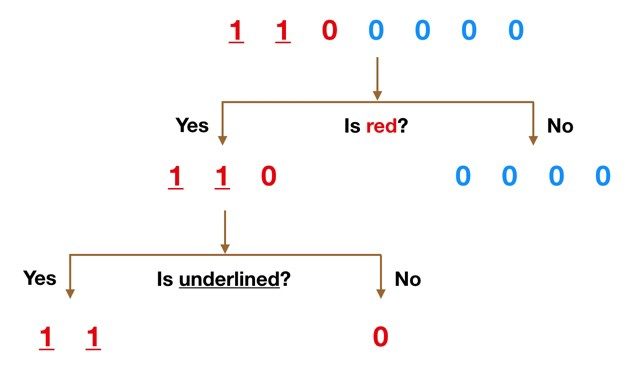

The criterion for splitting over each decision node can be "gini impurity" or "entropy".

Now an example of how Random Forest as a whole works:

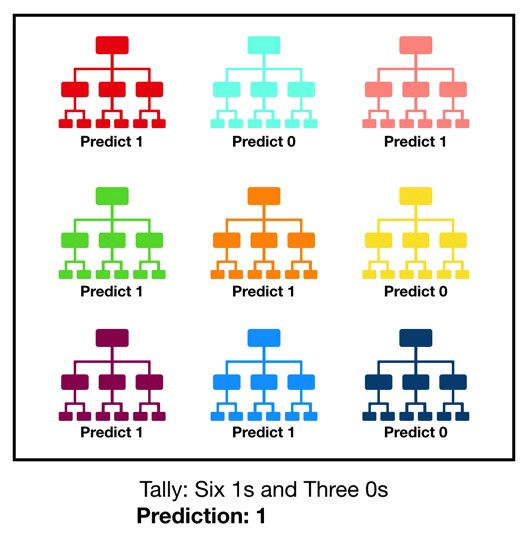

Images taken from: [https://towardsdatascience.com/understanding-random-forest-58381e0602d2](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

Let's optimize the model over different parameters:

**ATTENTION: you don't need to run the cell below, run the next cell!**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib as jb

# defining param_grid for optimization
params = {"n_estimators": range(100, 350, 50), # quantity of trees
          "criterion": ["gini", "entropy"], # criterion for splitting
          "max_features": [4, 5, 6, 7, 8, 9]} # max_features considered for splitting

# initializing generic model
rfc = RandomForestClassifier()

# initializing gridsearchcv object for optimization
gs_rfc = GridSearchCV(rfc, param_grid = params, n_jobs = -1, verbose = 3, refit = True,
                      cv = 5)

# starting optimization
gs_rfc.fit(X, fst_set["phase"])

# saving optimized model
jb.dump(gs_rfc, pwd + "gs_rfc.pkl")

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.3min finished


['/content/drive/MyDrive/Colab Notebooks/Sleep Classification, Data Science/gs_rfc.pkl']

In [ ]:
# RUNNING THIS CELL YOU CAN LOAD THE MODEL ALREADY OPTIMIZED
import joblib as jb

gs_rfc = jb.load(pwd + "gs_rfc.pkl")

Taking a look in the results of the best model found:

In [ ]:
rfc_tb = pd.DataFrame(gs_rfc.cv_results_)
rfc_tb.loc[gs_rfc.best_index_, ["mean_test_score", "std_test_score"]]

mean_test_score      0.911279
std_test_score     0.00992299
Name: 14, dtype: object

The best model had a mean test score of 91.13%, with standard deviation equal to 0.99%. Let's see the combination of parameters for that model:

In [ ]:
gs_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The best model used "gini" as split criterion, max features = 6 and `n_estimators = 300`.

Let's compare the performance of RFC under the different split criterions:

---

**Boxplot comparing the two split criterion**

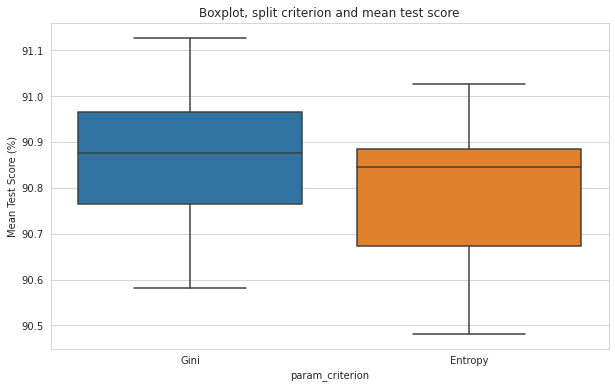

In [ ]:
sns.set_style("whitegrid")

# creating temporary variable
temp = rfc_tb.copy()
temp.mean_test_score *= 100
temp.param_criterion = temp.param_criterion.apply(lambda s: s.capitalize())

# plotting
_, axis = plt.subplots(figsize = (10, 6))
sns.boxplot(data = temp, x = "param_criterion", y = "mean_test_score",
            ax = axis)
plt.ylabel("Mean Test Score (%)")
plt.title("Boxplot, split criterion and mean test score" )
plt.show()

We can see that the gini split criterion tends to be slightly better.

Now let's see how `n_estimators` affect mean test score:

---

**Mean test score and n_estimators**

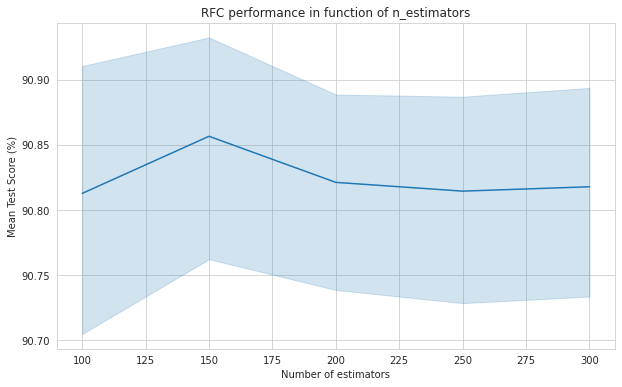

In [ ]:
sns.set_style("whitegrid")

# plotting
_, axis = plt.subplots(figsize = (10, 6))
sns.lineplot(data = temp, x = "param_n_estimators", y = "mean_test_score",
             ax = axis)
plt.xlabel("Number of estimators")
plt.ylabel("Mean Test Score (%)")
plt.title("RFC performance in function of n_estimators" )
plt.show()

The plot clearly suggests that the optimal value for `n_estimators` is around 150 in the case of our data.

Let's see the effect of `max_features`:

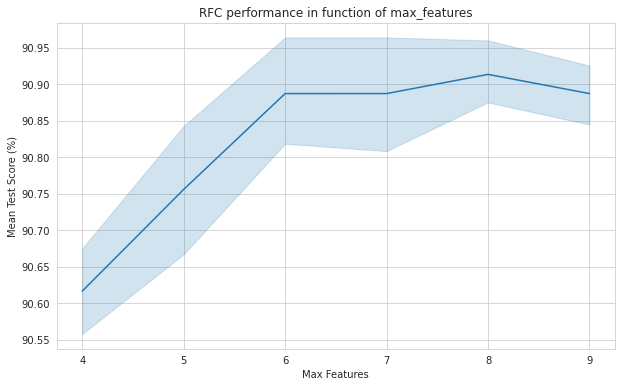

In [ ]:
sns.set_style("whitegrid")

# plotting
_, axis = plt.subplots(figsize = (10, 6))
sns.lineplot(data = temp, x = "param_max_features", y = "mean_test_score",
             ax = axis)
plt.xlabel("Max Features")
plt.ylabel("Mean Test Score (%)")
plt.title("RFC performance in function of max_features" )
plt.show()

The optimal value for max_features seems to be between 6 and 8.

Why our model didn't have the very same best parameters suggested by the plots? Because it is possible. Remember that Random Forest is a "random" model, and therefore the "best" model found by GridSearchCV could not match exactly with what a minucious study of the parameters would indicate.

Next model now.

---

**Ada Boost Classifier**

Ada Boost Classifier is an ensemble model too, like Random Forest. It is based on weaker classifiers, generally decision trees with `max_depth = 1`. Each classifier is generated subsequentially and trained on a sample of the training set. They try to "correct" the errors of the previous classifier, and this is done by giving more weight for the data points that were misclassified. In this way, these data points have more chance to be sampled during the next training.

Ada Boost is a "**boosting ensemble**". See the image below, that represents the difference between bagging and boosting ensembles:

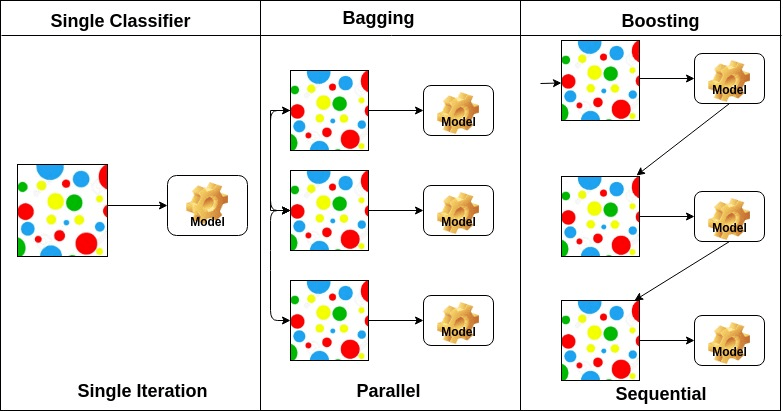

Now a image demonstrating how Ada Boost works:

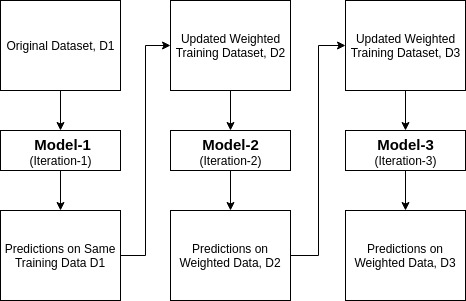

Images taken from: [https://www.datacamp.com/community/tutorials/adaboost-classifier-python](https://www.datacamp.com/community/tutorials/adaboost-classifier-python)

The final prediction is based on the mode of all the predictions, but with higher weights for the classifiers that scores higher in the training set.

Let's optimize the model over the total number of estimators (or iterations) and over learning_rate (weight of the subsequent weak classifiers):

**ATTENTION: you don't need to run the cell below, run the next cell!**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import joblib as jb

# defining param_grid for optimization
params = {"n_estimators": [50, 250, 500, 1000], # trying different quantities of weak classifiers
          "learning_rate": np.logspace(-5, 0, 5)} # giving different weights for the subsequent trees

# initializing generic model
abc = AdaBoostClassifier()

# initializing gridsearchcv object for optimization
gs_abc = GridSearchCV(abc, param_grid = params, n_jobs = -1, verbose = 3, refit = True,
                      cv = 5)

# starting optimization
gs_abc.fit(X, fst_set["phase"])

# saving optimized model
jb.dump(gs_abc, pwd + "gs_abc.pkl")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.1min finished


['/content/drive/MyDrive/Colab Notebooks/Sleep Classification, Data Science/gs_abc.pkl']

In [ ]:
# RUNNING THIS CELL YOU CAN LOAD THE MODEL ALREADY OPTIMIZED
import joblib as jb

gs_abc = jb.load(pwd + "gs_abc.pkl")

Taking a look in the best result:

In [ ]:
abc_tb = pd.DataFrame(gs_abc.cv_results_)
abc_tb.loc[gs_abc.best_index_, ["mean_test_score", "std_test_score"]]

mean_test_score      0.902183
std_test_score     0.00633144
Name: 13, dtype: object

The mean test score of the best model were 90.22%, with standard deviation of 0.63%. Let's see for which n_estimators it occured:

In [ ]:
gs_abc.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.05623413251903491, n_estimators=250,
                   random_state=None)

Now let's plot a heatmap, so we can analyse how was mean test score for each pair n_estimator, learning_rate:

---

**Heat map for mean test score**

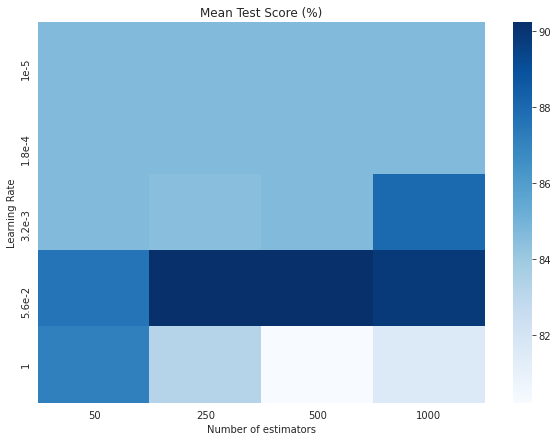

In [ ]:
_, axis = plt.subplots(figsize = (10, 7))

# constructing grid for mean_test_score
heat = 100*np.array(abc_tb["mean_test_score"]).reshape((5,4))

# plotting
sns.heatmap(100*np.array(abc_tb["mean_test_score"]).reshape((5,4)), cmap = "Blues", ax = axis,
            xticklabels = ["50", "250", "500", "1000"],
            yticklabels = ["1e-5", "1.8e-4", "3.2e-3", "5.6e-2", "1"])
plt.xlabel("Number of estimators")
plt.ylabel("Learning Rate")
plt.title("Mean Test Score (%)")
plt.show()

The peak is around n_estimators = 250 and learning_rate = 5.6e-2.

---


##**Predicting over sec_set**

We analysed 4 classifiers in the total, but they all had a good performance (at least with the best found parameters) in the context of 5 fold cross validation.

Let's construct a boxplot for each best model, so we can have an idea of how the test score over the 5 fold cross validation distributes itself:

In [ ]:
# organizing data
gss = [gs_svc, gs_knc, gs_rfc, gs_abc]
models = [svc_tb, knc_tb, rfc_tb, abc_tb]
models_nms = ["SVC", "KNC", "RFC", "ABC"]
splits = ["split{}_test_score".format(i) for i in range(5)]

In [ ]:
# creating list with score in each split for each model
score_tb = []
for i, model in enumerate(models):
    score_tb.append(100*model.loc[gss[i].best_index_, splits])

In [ ]:
# transforming list into a dataframe
score_tb = pd.DataFrame(score_tb, index = models_nms).transpose()
score_tb

,SVC,KNC,RFC,ABC
split0_test_score,91.616162,91.212121,91.010101,89.898990
split1_test_score,91.313131,91.111111,91.212121,90.505051
split2_test_score,90.707071,91.010101,90.505051,89.898990
split3_test_score,89.989889,89.686552,89.989889,89.484328
split4_test_score,92.517695,92.214358,92.922144,91.304348


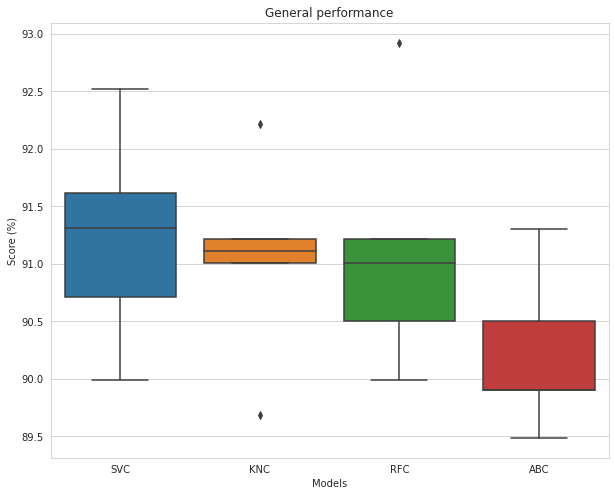

In [ ]:
# creating boxplot
_, axis = plt.subplots(figsize = (10, 8))
sns.boxplot(data = score_tb, ax = axis)
plt.xlabel("Models")
plt.ylabel("Score (%)")
plt.title("General performance")
plt.show()

It's hard to decide which model performed better, given that clearly there are intersections between each distribution. But visually SVC seems to have the best performance.

Let's use all the models to predict over sec_set and then analyse the results using the confusion matrices:

In [ ]:
# first we need to apply to sec_set all the transformations that we did with fst_lset
# that is -> log transform -> standardize -> to reduce dimensionality

# log transformed is already done with sec_logset

# standardizing
sec_stdzd = sec_logset.drop(columns = ["time", "phase"])
for col in list(sec_stdzd):
    sec_stdzd[col] = (sec_stdzd[col] - np.mean(fst_logset[col]))/np.std(fst_logset[col])

# dimensionality reduction
X_test = pca_all.transform(sec_stdzd)[:, :26]

In [ ]:
# defining functions to take results
def take_results(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
    
    # predicting
    y_pred = model.predict(X_test)

    # constructing confusion matrix
    cm = confusion_matrix(sec_logset["phase"], y_pred, labels = ["WAKE", "NREM", "REM"])
    cm = pd.DataFrame(cm, index = ["WAKE_True", "NREM_True", "REM_True"],
                    columns = ["WAKE_pred", "NREM_pred", "REM_pred"])

    # calculating general accuracy
    acc = accuracy_score(sec_logset["phase"], y_pred)

    # calculating f-1 score
    f1 = f1_score(sec_logset["phase"], y_pred, average = "macro")
    return cm, acc, f1


---

**SVC Results**

In [ ]:
cm_svc, acc_svc, f1_svc = take_results(gs_svc, X_test, sec_logset["phase"])

Confusion matrix

In [ ]:
cm_svc

,WAKE_pred,NREM_pred,REM_pred
WAKE_True,2406,207,7
NREM_True,137,1843,10
REM_True,22,16,299


General accuracy

In [ ]:
acc_svc

0.9193450576106731

F-1 score (that is equal to `2 * (precision * recall)/(precision + recall)`)

In [ ]:
f1_svc

0.9175373968524569

---

**KNC results**

In [ ]:
cm_knc, acc_knc, f1_knc = take_results(gs_knc, X_test, sec_logset["phase"])

Confusion matrix

In [ ]:
cm_knc

,WAKE_pred,NREM_pred,REM_pred
WAKE_True,2358,261,1
NREM_True,114,1872,4
REM_True,33,19,285


General accuracy

In [ ]:
acc_knc

0.9126743480897513

F-1 score

In [ ]:
f1_knc

0.911065728357999

---

**RFC Results**

In [ ]:
cm_rfc, acc_rfc, f1_rfc = take_results(gs_rfc, X_test, sec_logset["phase"])

Confusion matrix

In [ ]:
cm_rfc

,WAKE_pred,NREM_pred,REM_pred
WAKE_True,2418,196,6
NREM_True,160,1824,6
REM_True,46,16,275


General accuracy

In [ ]:
acc_rfc

0.9130786335152618

F-1 score

In [ ]:
f1_rfc

0.9032391119694642

---

**ABC Results**

In [ ]:
cm_abc, acc_abc, f1_abc = take_results(gs_abc, X_test, sec_logset["phase"])

Confusion matrix

In [ ]:
cm_abc

,WAKE_pred,NREM_pred,REM_pred
WAKE_True,2335,271,14
NREM_True,133,1850,7
REM_True,48,20,269


General accuracy

In [ ]:
acc_abc

0.9003436426116839

F-1 score

In [ ]:
f1_abc

0.8876630159955562

**Table of Results**

In [ ]:
# constructing it
tb = pd.DataFrame(100*np.array(((acc_svc, f1_svc),
                                (acc_knc, f1_knc),
                                (acc_rfc, f1_rfc),
                                (acc_abc, f1_abc))), columns = ["Accuracy (%)", "F1 score (%)"],
                  index = models_nms)

# printing it
tb

,Accuracy (%),F1 score (%)
SVC,91.934506,91.753740
KNC,91.267435,91.106573
RFC,91.307863,90.323911
ABC,90.034364,88.766302


In the test set, we can see that SVC had the best performance, according to what the boxplot was suggesting.